# 1. Basic modeling with mecabio

In [1]:
%matplotlib inline

import matplotlib.pylab as plt

from kt_simul.mecabio import Structure, Point, Link
from kt_simul.mecabio import Model, dampedspring, viscous
from kt_simul.mecabio import spring, dashpot, linear_fv, contraction

from kt_simul.visu import StructureViewer
from kt_simul.visu import StructureWidget

import pandas as pd
import numpy as np

Simulate two points linked together by a linear force which push on them.

In [2]:
struct = Structure('simple 2 points system')
p0 = struct.add_point(idx=0, init_pos=[2, 0, 0], color="black")
p1 = struct.add_point(idx=1, init_pos=[-2, 0, 0], color="green")
lnk = struct.add_link(p0, p1)

struct.update_geometry()
m = Model(struct)

def model_update(step):

    m.Bvect *= 0
    linear_fv(m, lnk, F_stall=1, v_max=1, gamma=1)
    struct.register_history(step)

for i in range(0, 30):
    m.solve()
    model_update(i)
    
struct.end_history()

Visualize points trajectories in 2D.

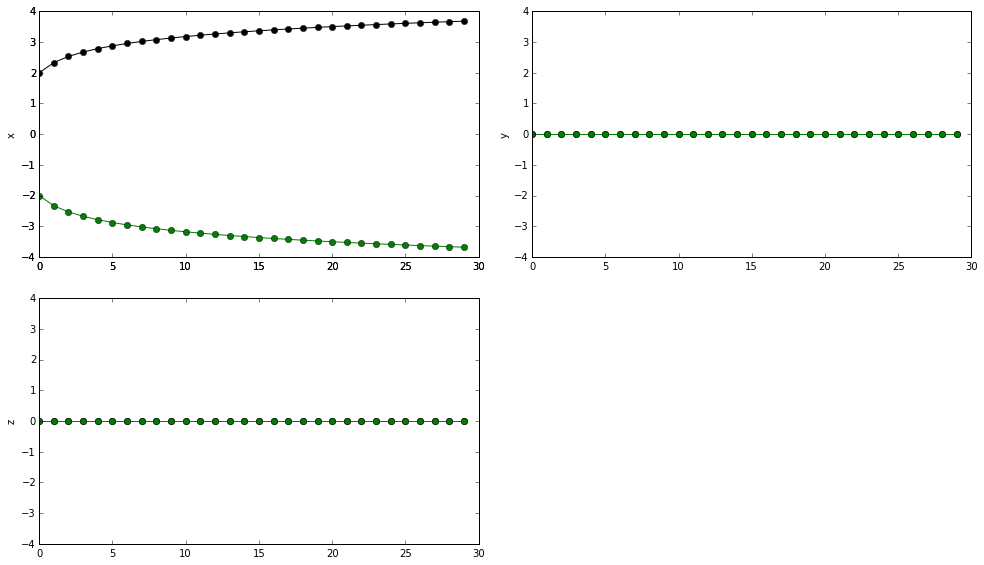

In [3]:
_ = struct.show()

Visualize points trajectories in 3D with vispy.

In [4]:
%matplotlib qt

# Pure vispy
v = StructureViewer(structure=struct)
v.play()

In [5]:
# Vispy + Qt
w = StructureWidget()
w.add_structure(struct)
w.show()